In [1]:
# import all revelant packages
from headers import *

In [2]:
params2 = {'output': 'mPk','P_k_max_h/Mpc': 40.,'non linear':'halofit', 
          'z_pk': '0.0,10','A_s': 2.10732e-9,'n_s': 0.96824,
          'alpha_s': 0.,'h': 0.6770, 'N_ur': 1.0196,
          'N_ncdm': 2,'m_ncdm': '0.01,0.05','tau_reio': 0.0568,
          'omega_b': 0.02247,'omega_cdm': 0.11923,'Omega_k': 0.}

cosmo2 = Class()
cosmo2.set(params2)
cosmo2.compute()
#
exp = experiment(zmin=2., zmax=5., nbins=6, fsky=0.34, sigma_z=0.0, LBG=True)
#
fLinear = fisherForecast(experiment=exp,cosmo=cosmo2,params=params2,khmin=5.e-4,\
                             khmax=1.,Nk=1000,Nmu=200,velocileptors=False,linear=True,name='Linear')

fLinear.marg_params = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','fEDE','b','N',\
                               'm_ncdm','N_ur','alpha_s','Omega_k'])
fLinear.compute_derivatives()

# Define two Never Gonna Happen (NGH) forecasts. 
## One which uses the vanilla linear power spectrum (ngh1),

In [2]:
c1 = {
          'output': 'mPk',
          'P_k_max_h/Mpc': 40.,
          'non linear':'halofit', 
          'z_pk': '0.0,10',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'alpha_s': 0.,
          'h': 0.6770,
          'N_ur': 1.0196,
          'N_ncdm': 2,
          'm_ncdm': '0.01,0.05',
          'tau_reio': 0.0568,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923,
          'Omega_k': 0.}

C1 = Class()
C1.set(c1)
C1.compute()
ngh1 = experiment(zmin=2., zmax=5., nbins=6, fsky=0.5, sigma_z=0.0, LBG=True, custom_n=True, n=0.001)
ngh1_f = fisherForecast(experiment=ngh1,cosmo=C1,params=c1,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='ngh1',smooth=True)
ngh1_f.marg_params = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','bs','alpha0','alpha2','alpha4','N','sn2'])

## and another which uses the smoothed linear power spectrum (ngh2).

In [3]:
c2 = {
          'output': 'mPk',
          'P_k_max_h/Mpc': 40.,
          'non linear':'halofit', 
          'z_pk': '0.0,10',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'alpha_s': 0.,
          'h': 0.6770,
          'N_ur': 1.0196,
          'N_ncdm': 2,
          'm_ncdm': '0.01,0.05',
          'tau_reio': 0.0568,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923,
          'Omega_k': 0.}

C2 = Class()
C2.set(c2)
C2.compute()
ngh2 = experiment(zmin=2., zmax=5., nbins=6, fsky=0.5, sigma_z=0.0, LBG=True, custom_n=True, n=0.001)
ngh2_f = fisherForecast(experiment=ngh2,cosmo=C2,params=c2,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='ngh2',smooth=False)
ngh2_f.marg_params = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','bs','alpha0','alpha2','alpha4','N','sn2'])

## Check that the smoothing was reasonable
The black curves show the smoothed power spectrum

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


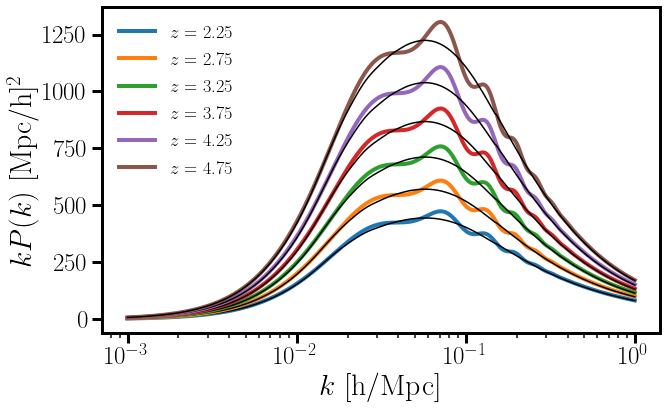

In [4]:
# check the fiducial power spectra
k = np.logspace(-3,0,1000)
plt.figure(figsize=(10,6))
for i in range(6):
   plt.semilogx(k,k*ngh2_f.get_f_at_fixed_mu(ngh2_f.P_fid[i],0.)(k),label=r'$z=$ '+str(ngh1.zcenters[i]),lw=4)
   plt.semilogx(k,k*ngh1_f.get_f_at_fixed_mu(ngh1_f.P_fid[i],0.)(k),color='k')
plt.xlabel(r'$k$ [h/Mpc]')
plt.ylabel(r'$k P(k)$ [Mpc/h]$^2$')
plt.legend(loc='upper left',fontsize='small',frameon=False)
plt.savefig('figures/wigs_v_no_wigs.pdf',bbox_inches='tight')

## Calculate and check the derivatives

In [9]:
ngh1_f.compute_derivatives()

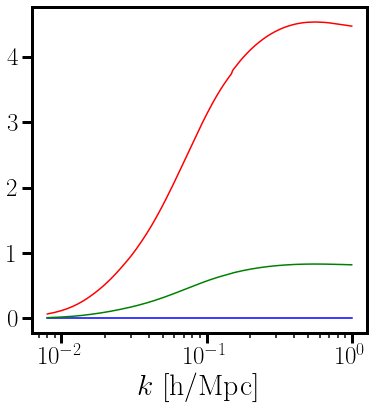

alpha2_275.txt


<Figure size 432x288 with 0 Axes>

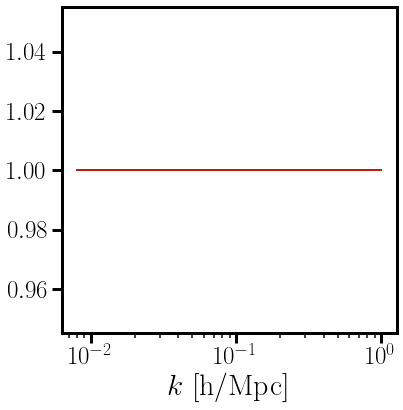

N_325.txt


<Figure size 432x288 with 0 Axes>

alpha2_375.txt


<Figure size 432x288 with 0 Axes>

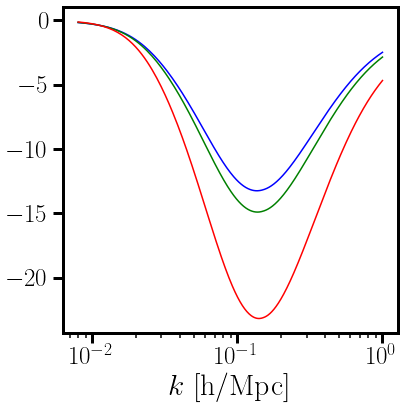

bs_275.txt


<Figure size 432x288 with 0 Axes>

omega_b_425.txt


<Figure size 432x288 with 0 Axes>

n_s_425.txt


<Figure size 432x288 with 0 Axes>

sn2_275.txt


<Figure size 432x288 with 0 Axes>

alpha4_325.txt


<Figure size 432x288 with 0 Axes>

tau_reio_275.txt


<Figure size 432x288 with 0 Axes>

omega_b_475.txt


<Figure size 432x288 with 0 Axes>

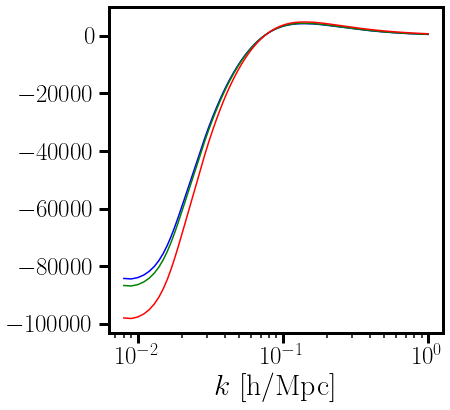

n_s_475.txt


<Figure size 432x288 with 0 Axes>

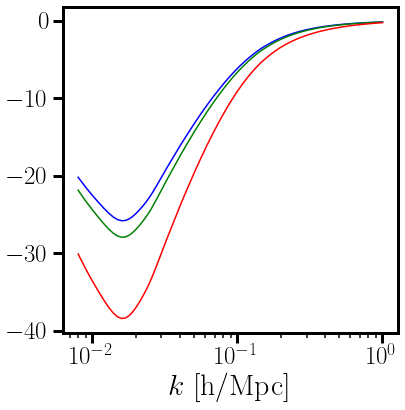

tau_reio_225.txt


<Figure size 432x288 with 0 Axes>

n_s_325.txt


<Figure size 432x288 with 0 Axes>

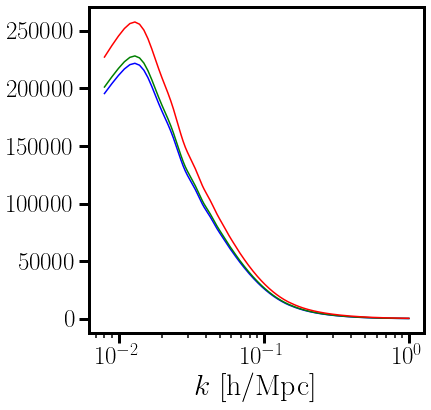

h_475.txt


<Figure size 432x288 with 0 Axes>

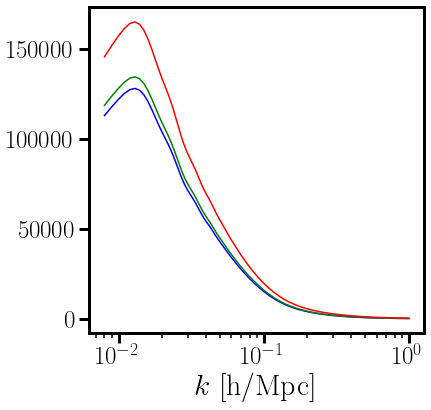

h_325.txt


<Figure size 432x288 with 0 Axes>

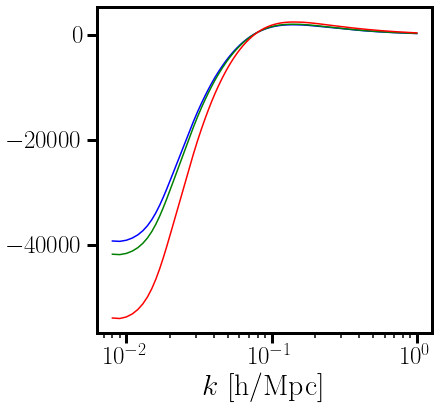

n_s_275.txt


<Figure size 432x288 with 0 Axes>

alpha4_475.txt


<Figure size 432x288 with 0 Axes>

n_s_225.txt


<Figure size 432x288 with 0 Axes>

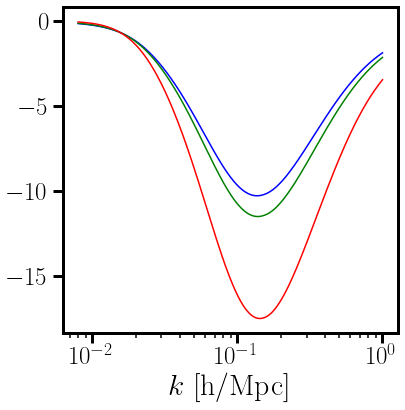

bs_325.txt


<Figure size 432x288 with 0 Axes>

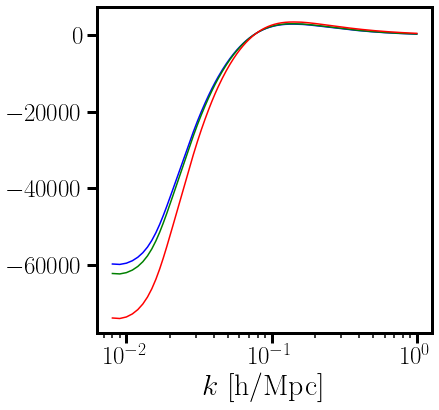

n_s_375.txt


<Figure size 432x288 with 0 Axes>

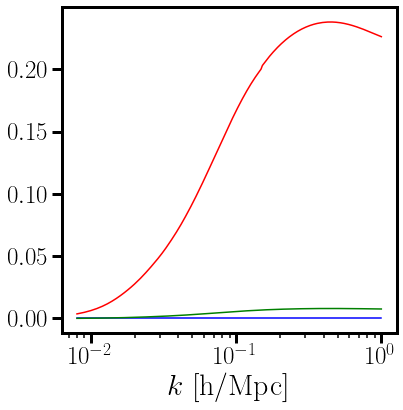

alpha4_375.txt


<Figure size 432x288 with 0 Axes>

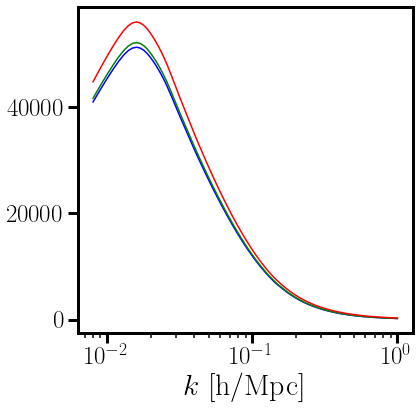

b_425.txt


<Figure size 432x288 with 0 Axes>

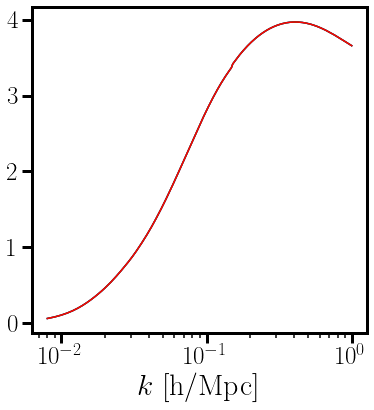

alpha0_475.txt


<Figure size 432x288 with 0 Axes>

sn2_375.txt


<Figure size 432x288 with 0 Axes>

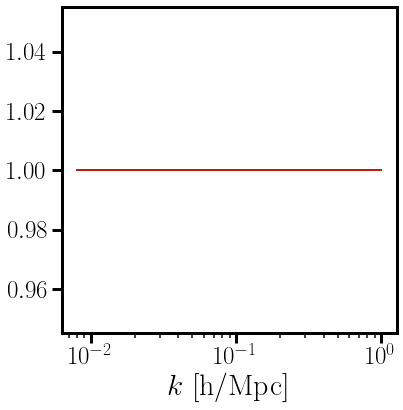

N_475.txt


<Figure size 432x288 with 0 Axes>

alpha4_425.txt


<Figure size 432x288 with 0 Axes>

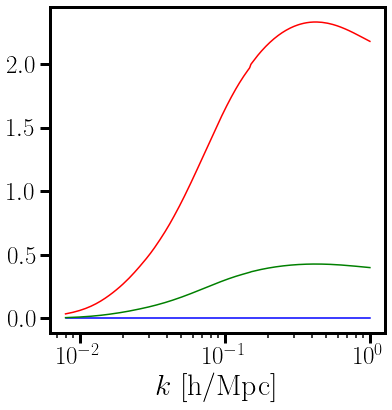

alpha2_425.txt


<Figure size 432x288 with 0 Axes>

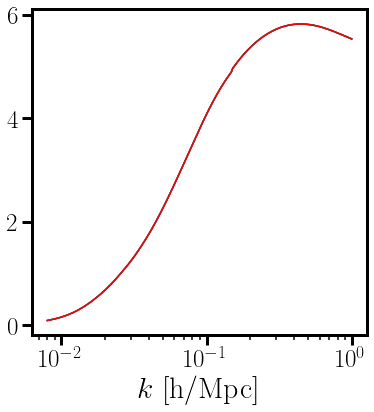

alpha0_375.txt


<Figure size 432x288 with 0 Axes>

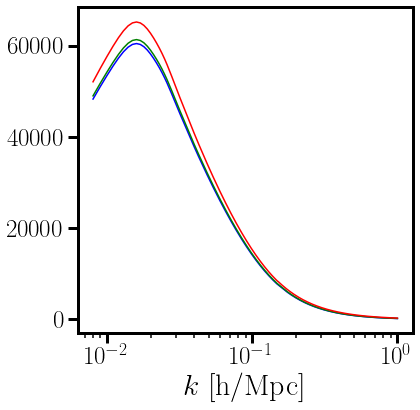

b_475.txt


<Figure size 432x288 with 0 Axes>

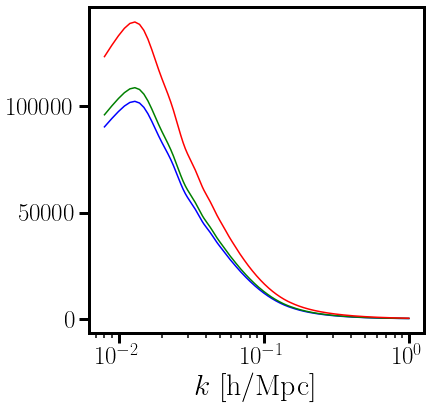

h_275.txt


<Figure size 432x288 with 0 Axes>

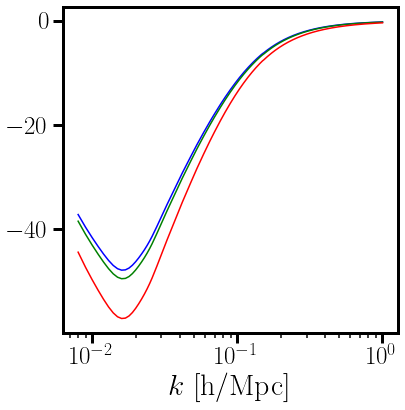

tau_reio_425.txt


<Figure size 432x288 with 0 Axes>

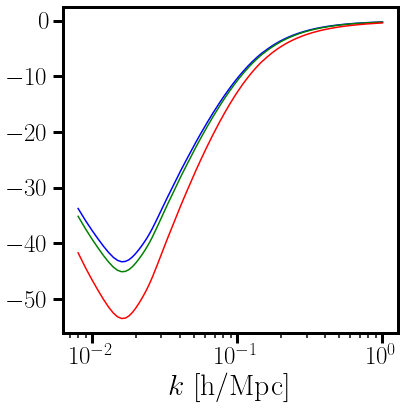

tau_reio_375.txt


<Figure size 432x288 with 0 Axes>

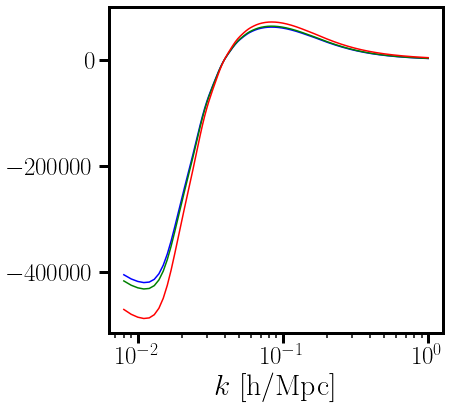

omega_cdm_475.txt


<Figure size 432x288 with 0 Axes>

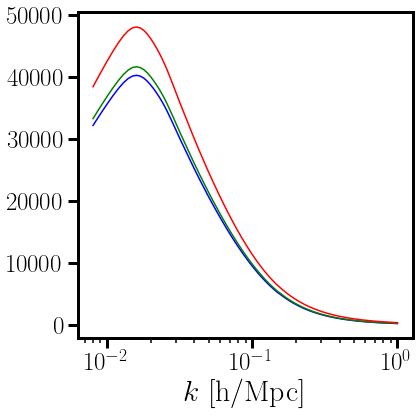

log(A_s)_425.txt


<Figure size 432x288 with 0 Axes>

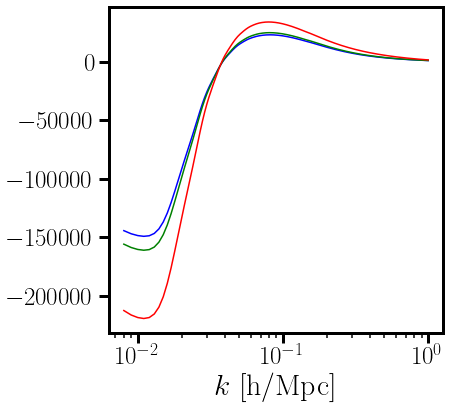

omega_cdm_225.txt


<Figure size 432x288 with 0 Axes>

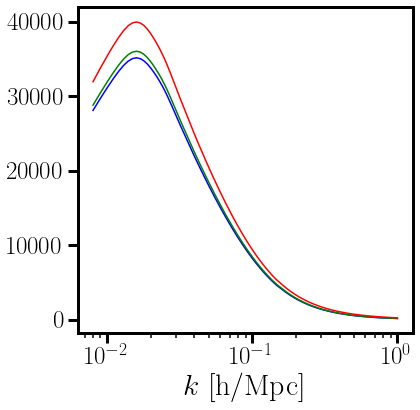

b_325.txt


<Figure size 432x288 with 0 Axes>

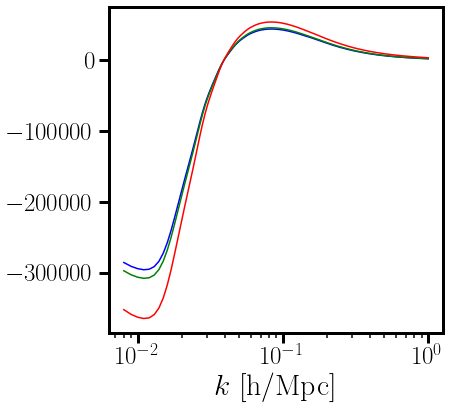

omega_cdm_375.txt


<Figure size 432x288 with 0 Axes>

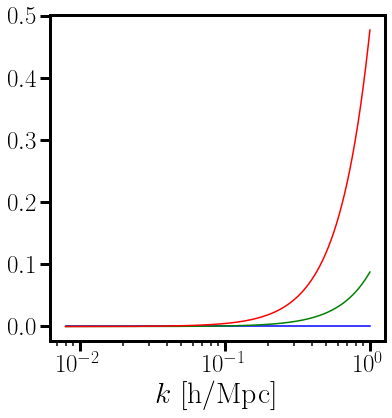

sn2_225.txt


<Figure size 432x288 with 0 Axes>

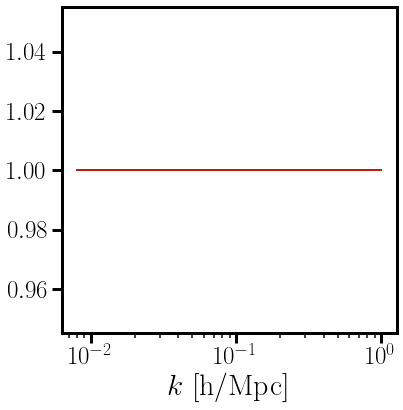

N_375.txt


<Figure size 432x288 with 0 Axes>

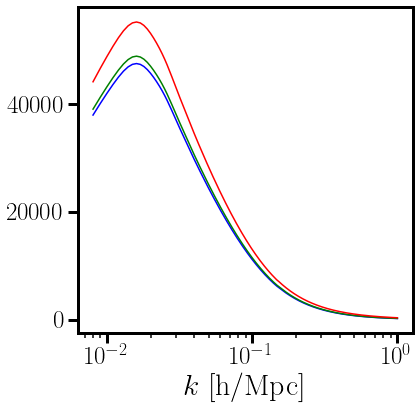

log(A_s)_475.txt


<Figure size 432x288 with 0 Axes>

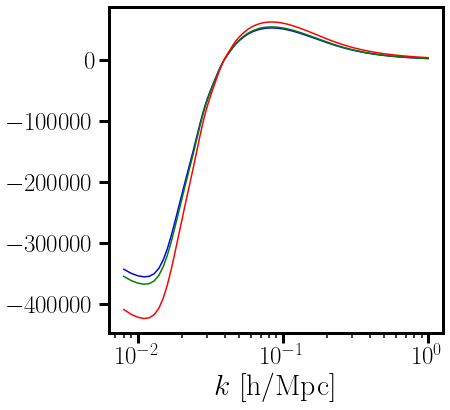

omega_cdm_425.txt


<Figure size 432x288 with 0 Axes>

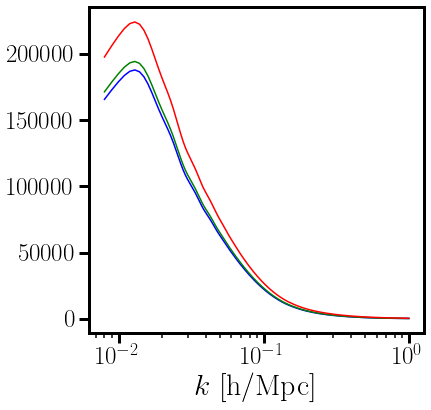

h_425.txt


<Figure size 432x288 with 0 Axes>

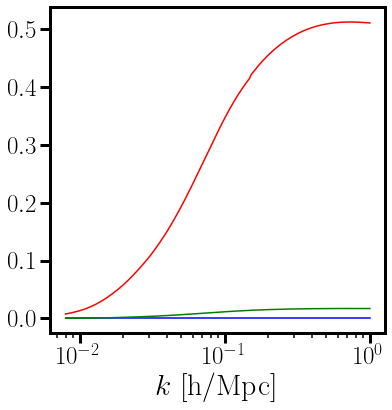

alpha4_225.txt


<Figure size 432x288 with 0 Axes>

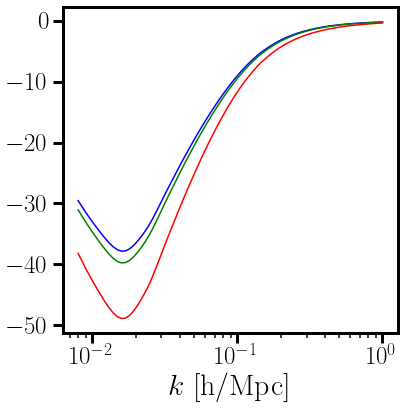

tau_reio_325.txt


<Figure size 432x288 with 0 Axes>

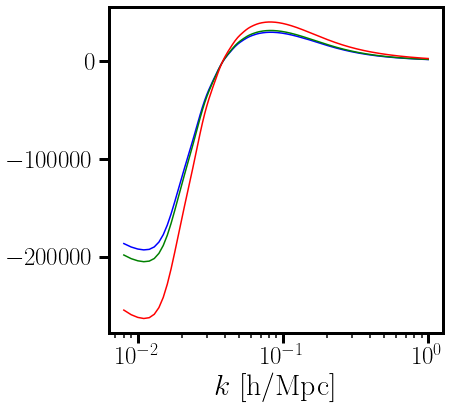

omega_cdm_275.txt


<Figure size 432x288 with 0 Axes>

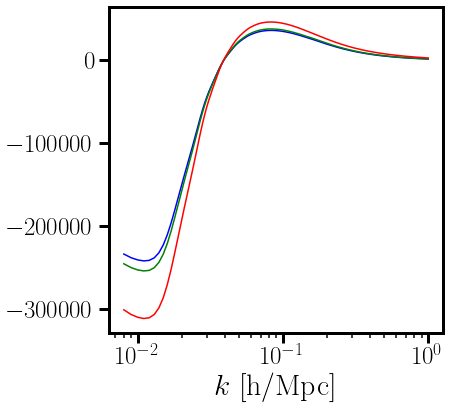

omega_cdm_325.txt


<Figure size 432x288 with 0 Axes>

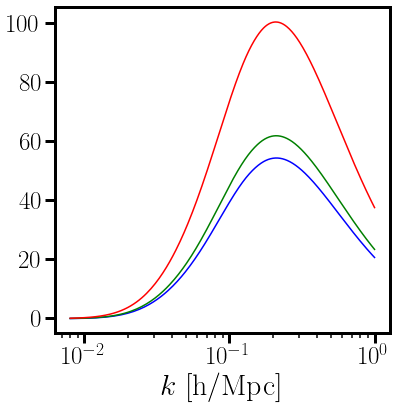

b2_225.txt


<Figure size 432x288 with 0 Axes>

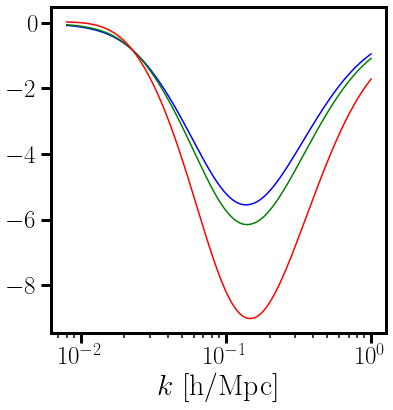

bs_475.txt


<Figure size 432x288 with 0 Axes>

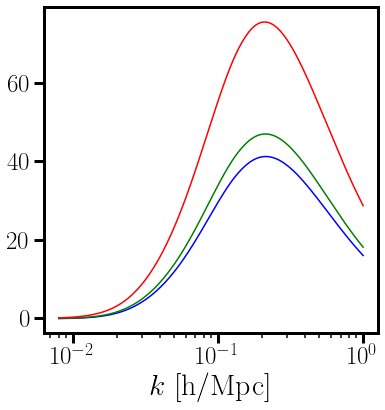

b2_275.txt


<Figure size 432x288 with 0 Axes>

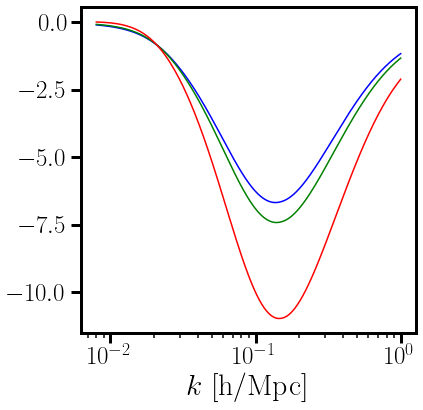

bs_425.txt


<Figure size 432x288 with 0 Axes>

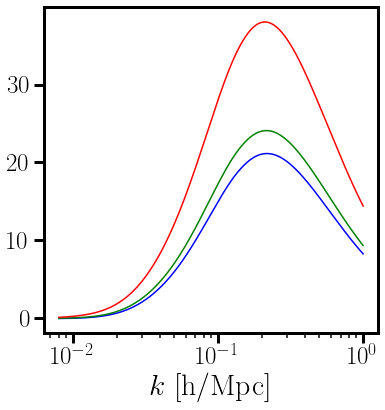

b2_425.txt


<Figure size 432x288 with 0 Axes>

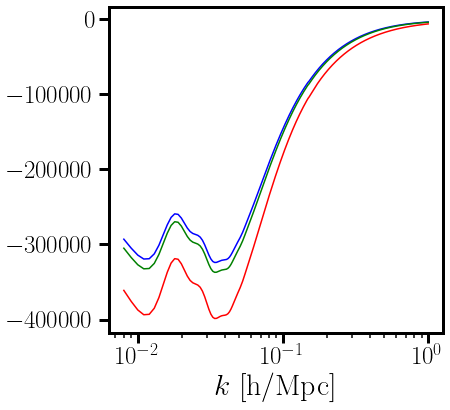

omega_b_375.txt


<Figure size 432x288 with 0 Axes>

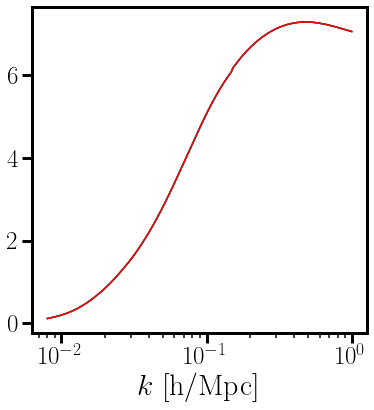

alpha0_325.txt


<Figure size 432x288 with 0 Axes>

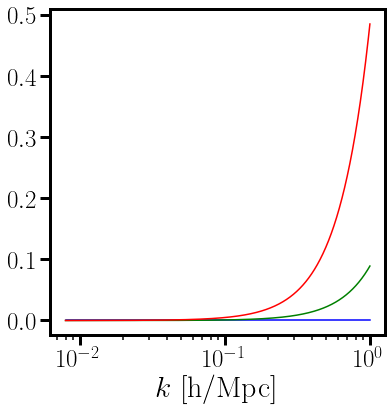

sn2_325.txt


<Figure size 432x288 with 0 Axes>

alpha0_225.txt


<Figure size 432x288 with 0 Axes>

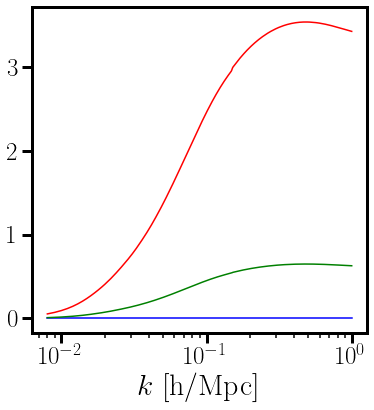

alpha2_325.txt


<Figure size 432x288 with 0 Axes>

tau_reio_475.txt


<Figure size 432x288 with 0 Axes>

alpha2_475.txt


<Figure size 432x288 with 0 Axes>

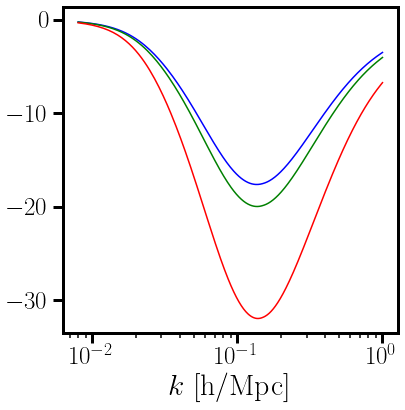

bs_225.txt


<Figure size 432x288 with 0 Axes>

b2_325.txt


<Figure size 432x288 with 0 Axes>

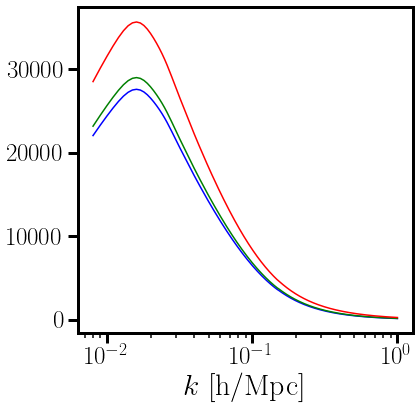

log(A_s)_325.txt


<Figure size 432x288 with 0 Axes>

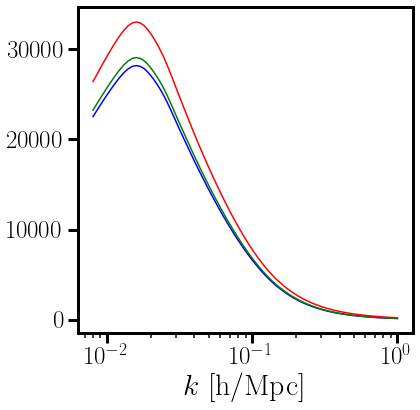

b_275.txt


<Figure size 432x288 with 0 Axes>

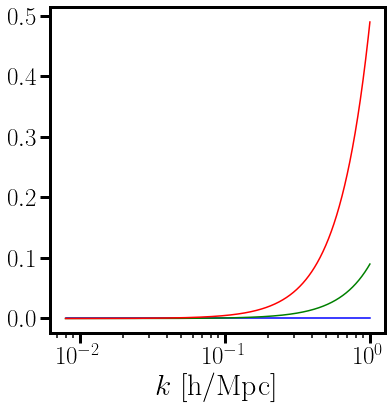

sn2_475.txt


<Figure size 432x288 with 0 Axes>

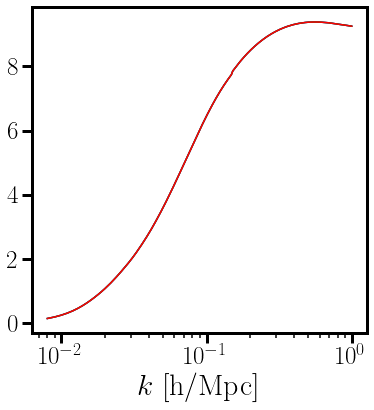

alpha0_275.txt


<Figure size 432x288 with 0 Axes>

b_225.txt


<Figure size 432x288 with 0 Axes>

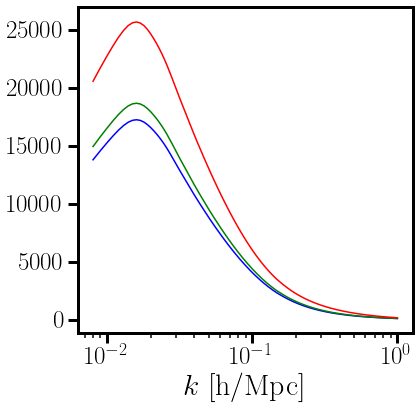

log(A_s)_225.txt


<Figure size 432x288 with 0 Axes>

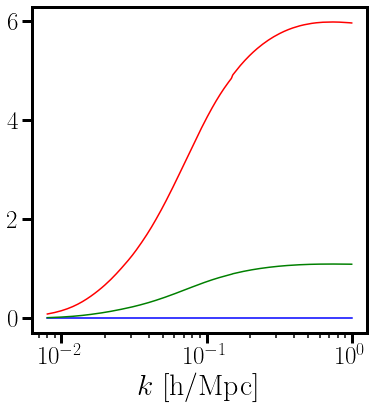

alpha2_225.txt


<Figure size 432x288 with 0 Axes>

alpha0_425.txt


<Figure size 432x288 with 0 Axes>

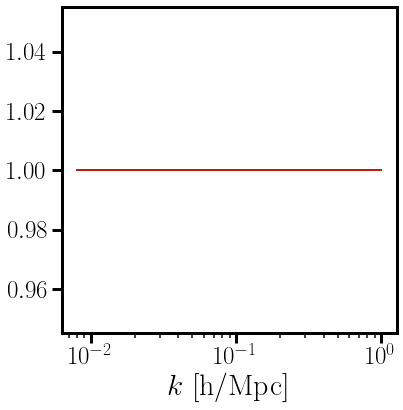

N_275.txt


<Figure size 432x288 with 0 Axes>

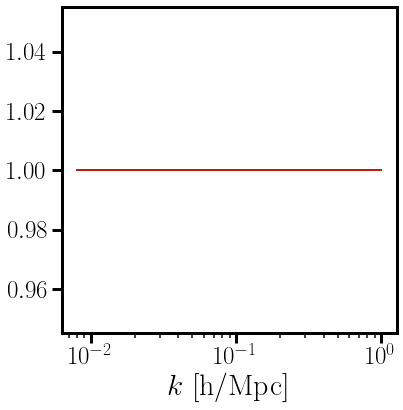

N_225.txt


<Figure size 432x288 with 0 Axes>

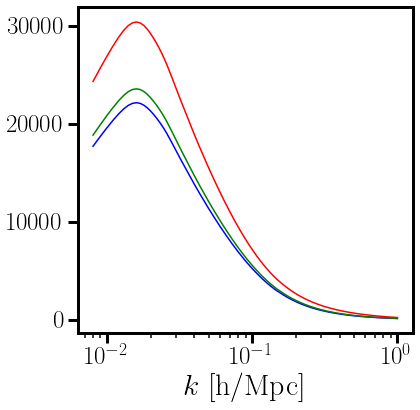

log(A_s)_275.txt


<Figure size 432x288 with 0 Axes>

h_225.txt


<Figure size 432x288 with 0 Axes>

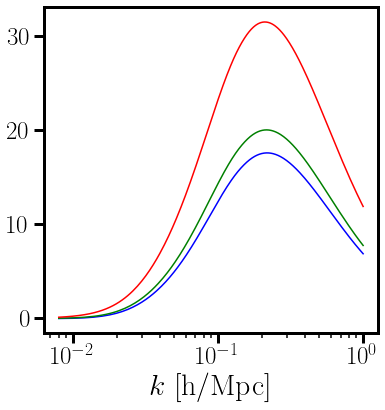

b2_475.txt


<Figure size 432x288 with 0 Axes>

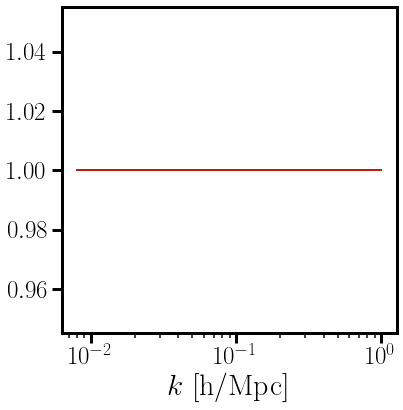

N_425.txt


<Figure size 432x288 with 0 Axes>

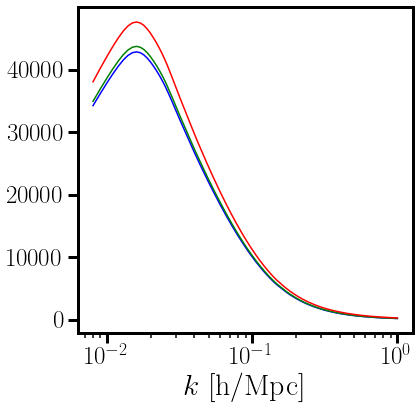

b_375.txt


<Figure size 432x288 with 0 Axes>

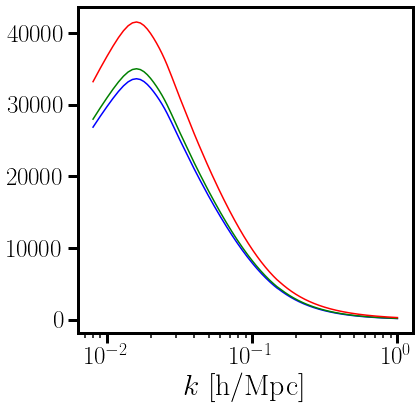

log(A_s)_375.txt


<Figure size 432x288 with 0 Axes>

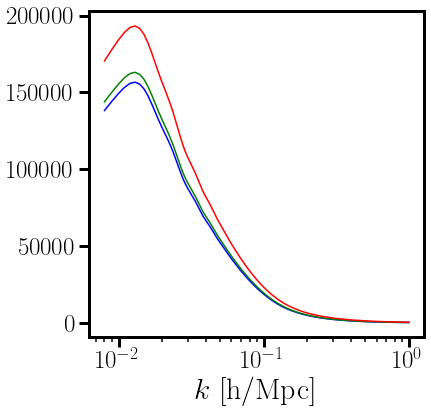

h_375.txt


<Figure size 432x288 with 0 Axes>

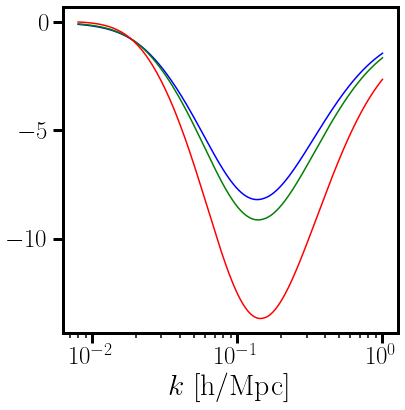

bs_375.txt


<Figure size 432x288 with 0 Axes>

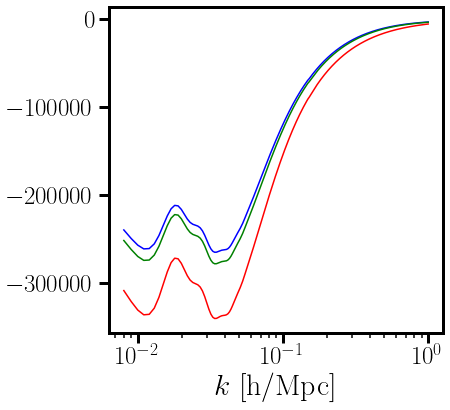

omega_b_325.txt


<Figure size 432x288 with 0 Axes>

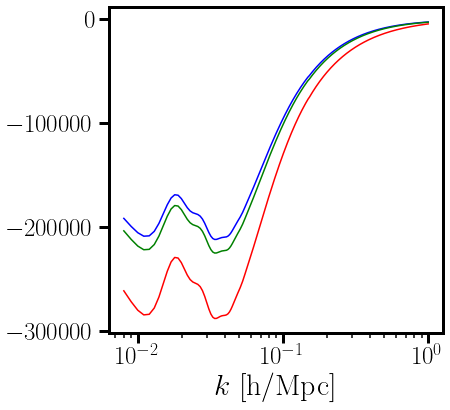

omega_b_275.txt


<Figure size 432x288 with 0 Axes>

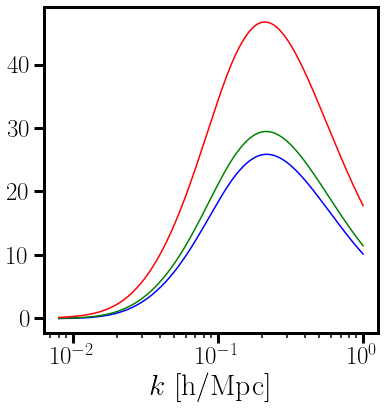

b2_375.txt


<Figure size 432x288 with 0 Axes>

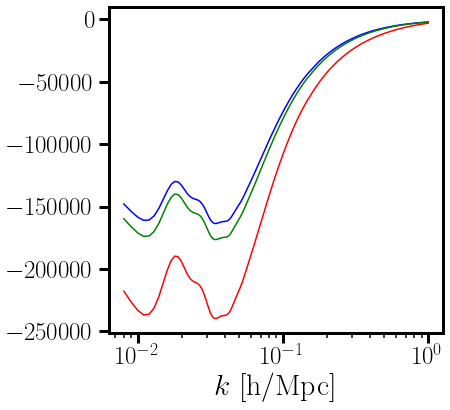

omega_b_225.txt


<Figure size 432x288 with 0 Axes>

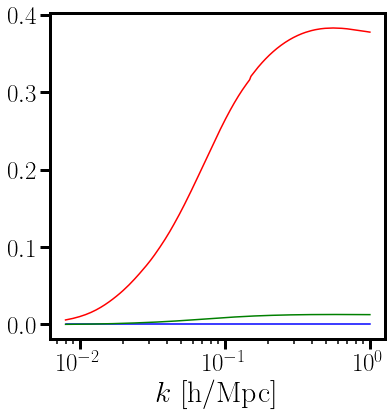

alpha4_275.txt


<Figure size 432x288 with 0 Axes>

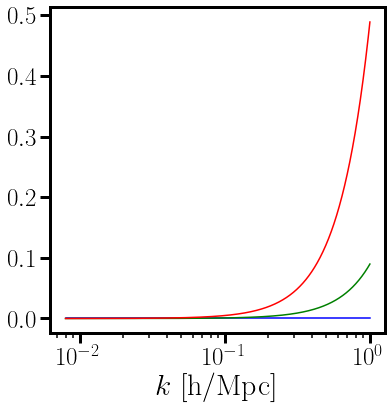

sn2_425.txt


<Figure size 432x288 with 0 Axes>

In [10]:
ngh1_f.check_derivatives()

In [11]:
ngh2_f.compute_derivatives()

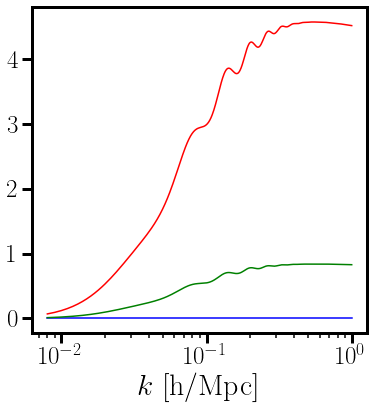

alpha2_275.txt


<Figure size 432x288 with 0 Axes>

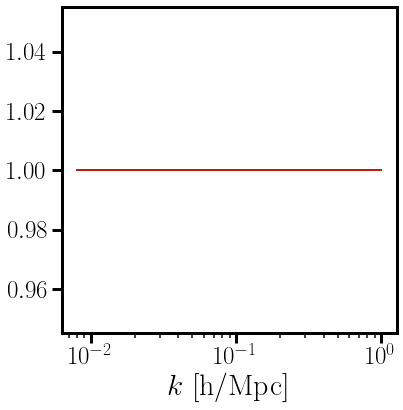

N_325.txt


<Figure size 432x288 with 0 Axes>

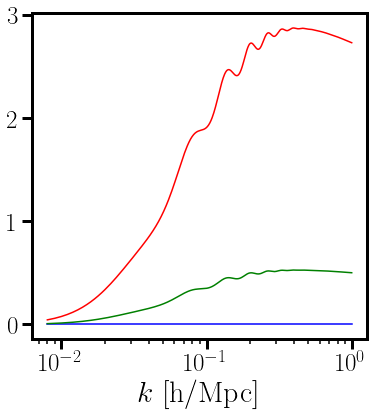

alpha2_375.txt


<Figure size 432x288 with 0 Axes>

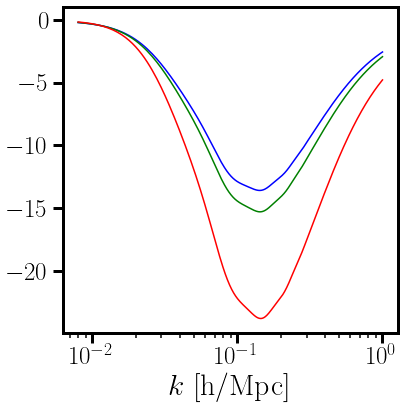

bs_275.txt


<Figure size 432x288 with 0 Axes>

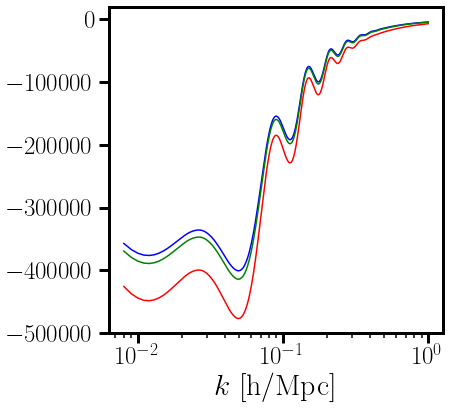

omega_b_425.txt


<Figure size 432x288 with 0 Axes>

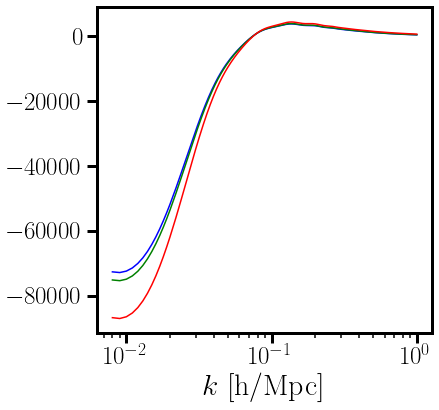

n_s_425.txt


<Figure size 432x288 with 0 Axes>

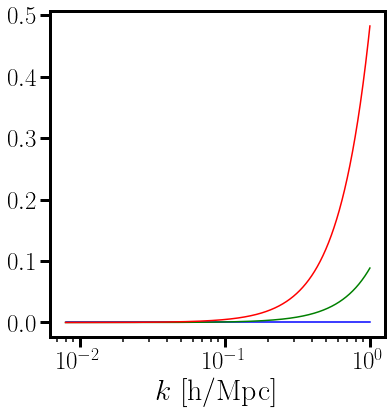

sn2_275.txt


<Figure size 432x288 with 0 Axes>

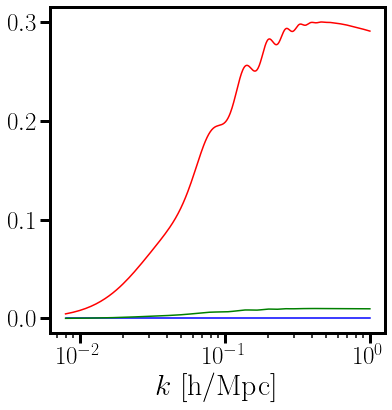

alpha4_325.txt


<Figure size 432x288 with 0 Axes>

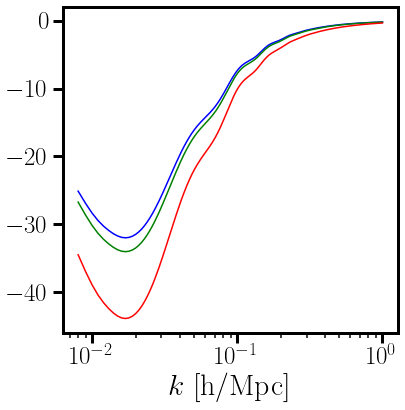

tau_reio_275.txt


<Figure size 432x288 with 0 Axes>

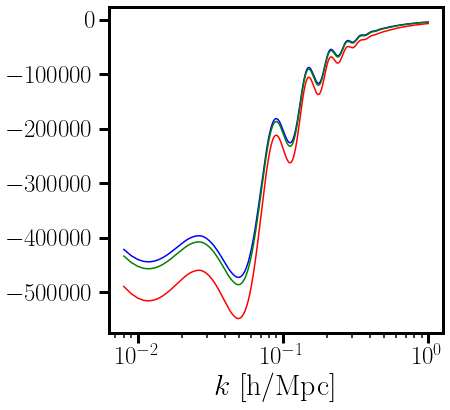

omega_b_475.txt


<Figure size 432x288 with 0 Axes>

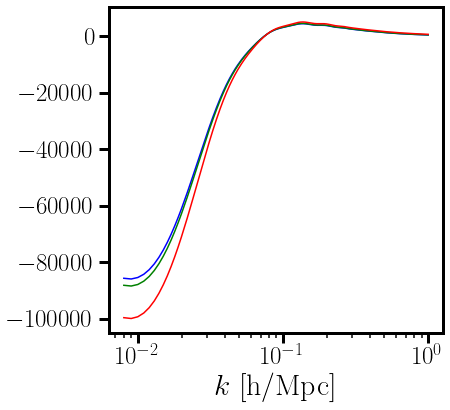

n_s_475.txt


<Figure size 432x288 with 0 Axes>

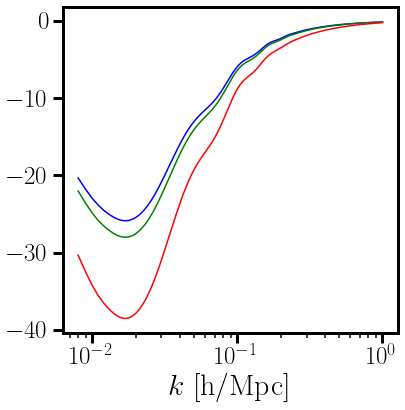

tau_reio_225.txt


<Figure size 432x288 with 0 Axes>

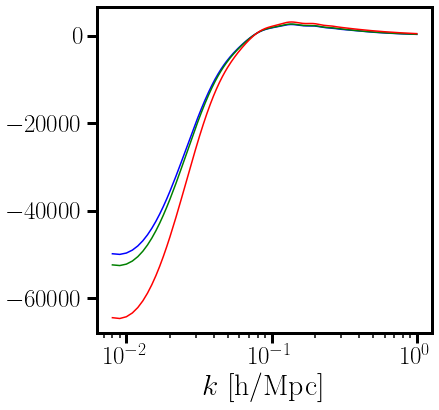

n_s_325.txt


<Figure size 432x288 with 0 Axes>

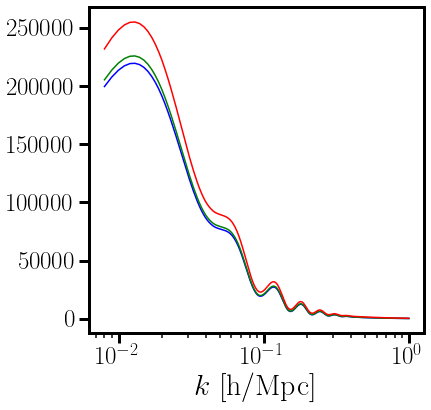

h_475.txt


<Figure size 432x288 with 0 Axes>

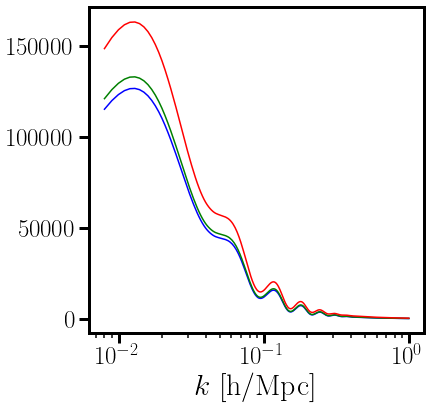

h_325.txt


<Figure size 432x288 with 0 Axes>

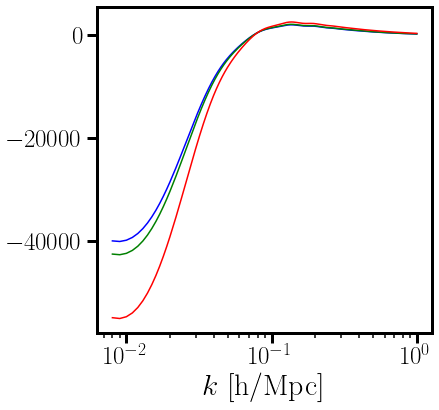

n_s_275.txt


<Figure size 432x288 with 0 Axes>

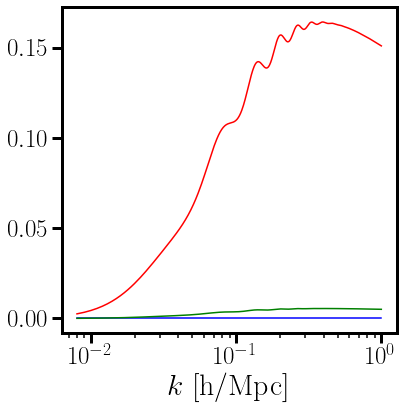

alpha4_475.txt


<Figure size 432x288 with 0 Axes>

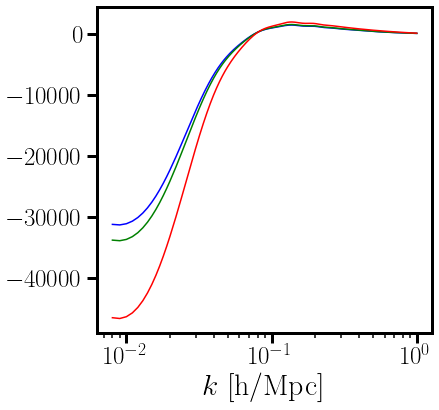

n_s_225.txt


<Figure size 432x288 with 0 Axes>

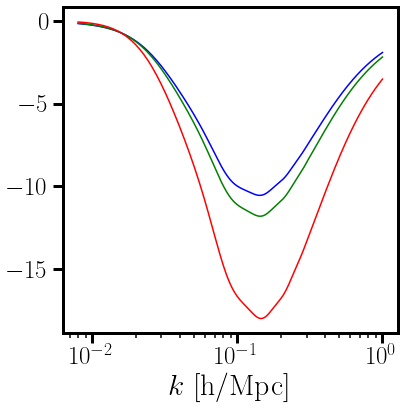

bs_325.txt


<Figure size 432x288 with 0 Axes>

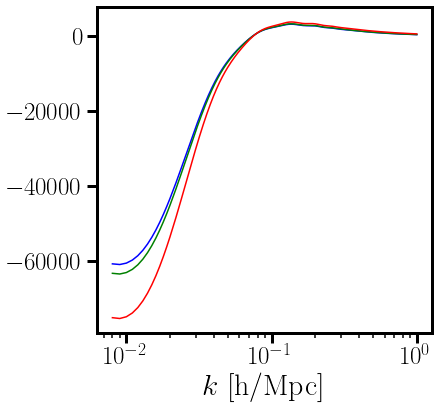

n_s_375.txt


<Figure size 432x288 with 0 Axes>

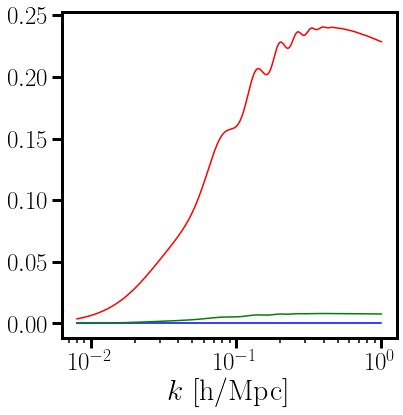

alpha4_375.txt


<Figure size 432x288 with 0 Axes>

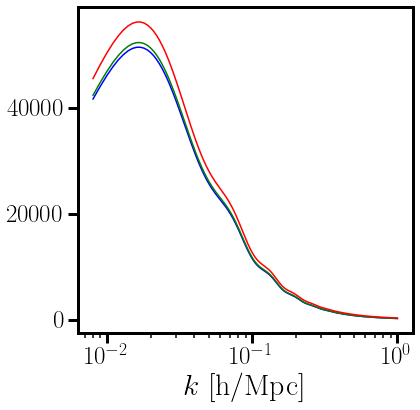

b_425.txt


<Figure size 432x288 with 0 Axes>

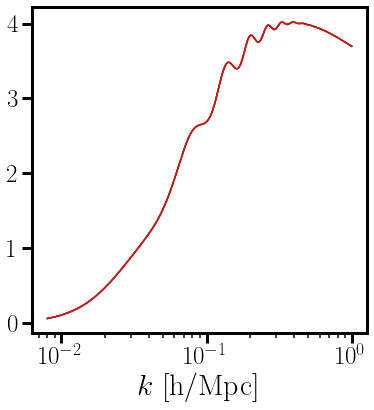

alpha0_475.txt


<Figure size 432x288 with 0 Axes>

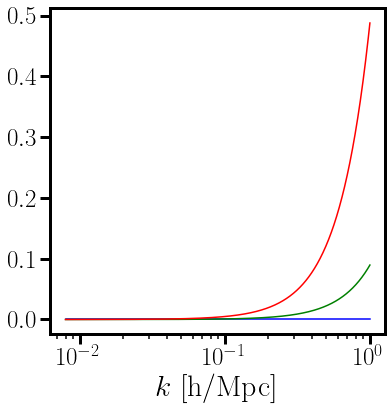

sn2_375.txt


<Figure size 432x288 with 0 Axes>

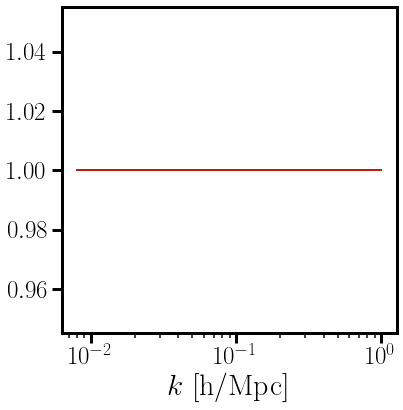

N_475.txt


<Figure size 432x288 with 0 Axes>

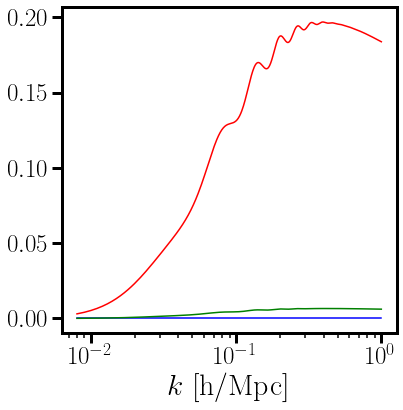

alpha4_425.txt


<Figure size 432x288 with 0 Axes>

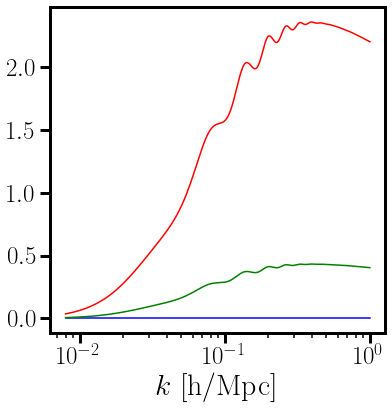

alpha2_425.txt


<Figure size 432x288 with 0 Axes>

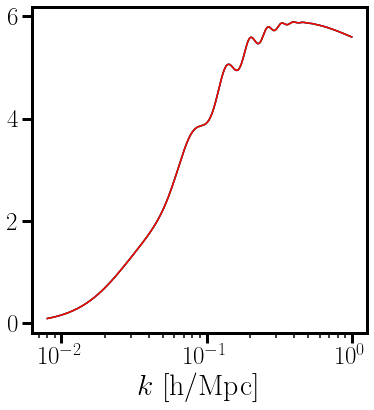

alpha0_375.txt


<Figure size 432x288 with 0 Axes>

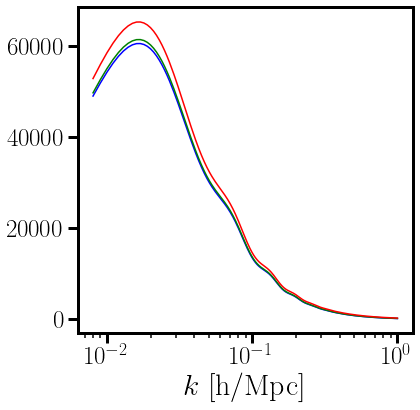

b_475.txt


<Figure size 432x288 with 0 Axes>

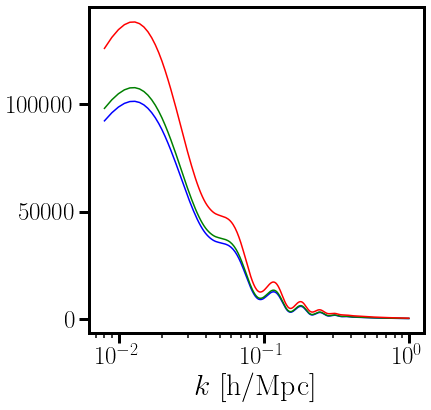

h_275.txt


<Figure size 432x288 with 0 Axes>

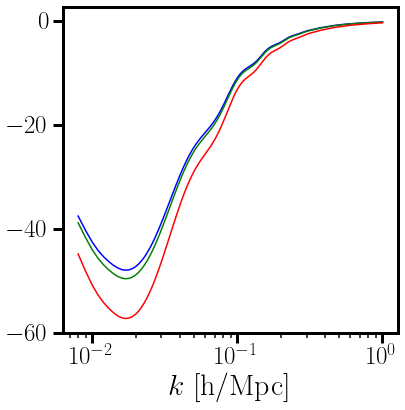

tau_reio_425.txt


<Figure size 432x288 with 0 Axes>

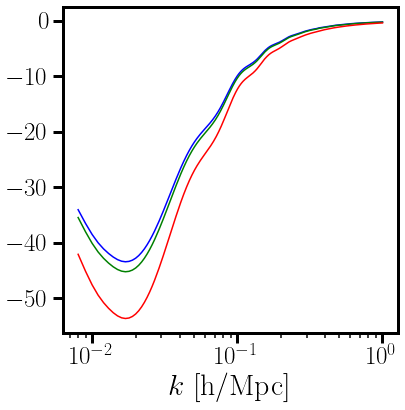

tau_reio_375.txt


<Figure size 432x288 with 0 Axes>

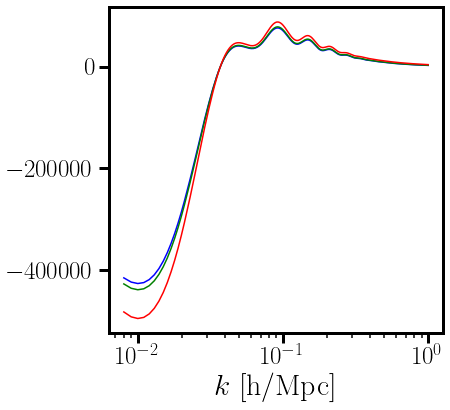

omega_cdm_475.txt


<Figure size 432x288 with 0 Axes>

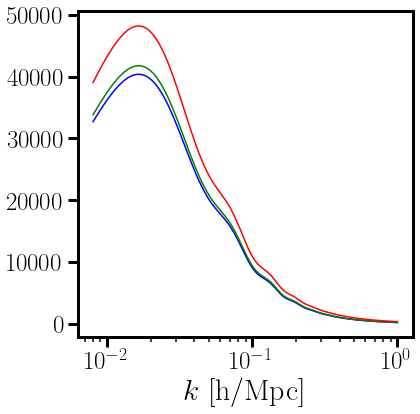

log(A_s)_425.txt


<Figure size 432x288 with 0 Axes>

omega_cdm_225.txt


<Figure size 432x288 with 0 Axes>

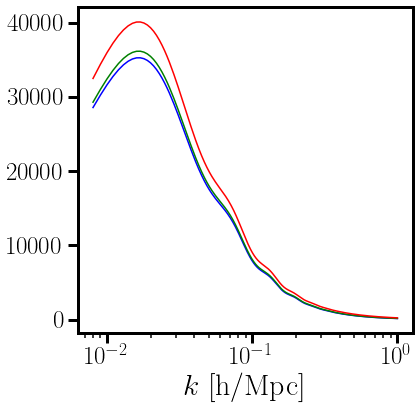

b_325.txt


<Figure size 432x288 with 0 Axes>

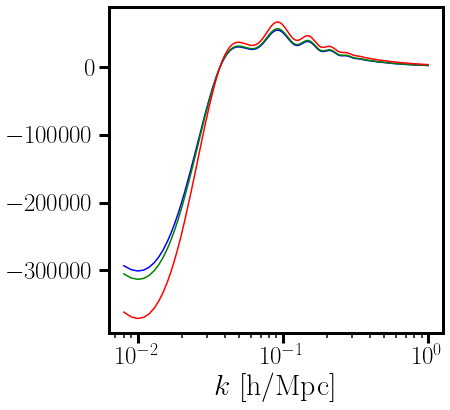

omega_cdm_375.txt


<Figure size 432x288 with 0 Axes>

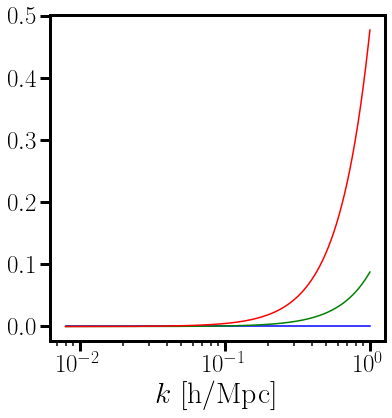

sn2_225.txt


<Figure size 432x288 with 0 Axes>

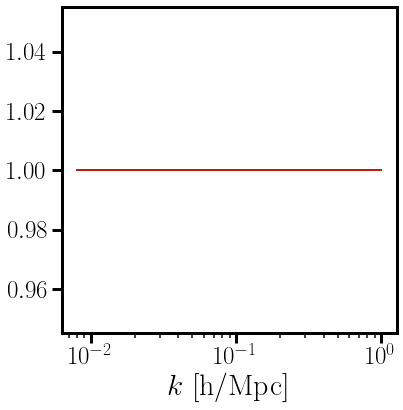

N_375.txt


<Figure size 432x288 with 0 Axes>

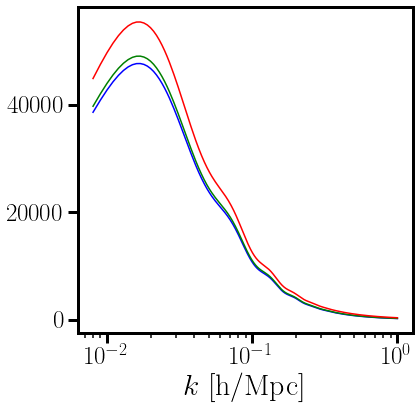

log(A_s)_475.txt


<Figure size 432x288 with 0 Axes>

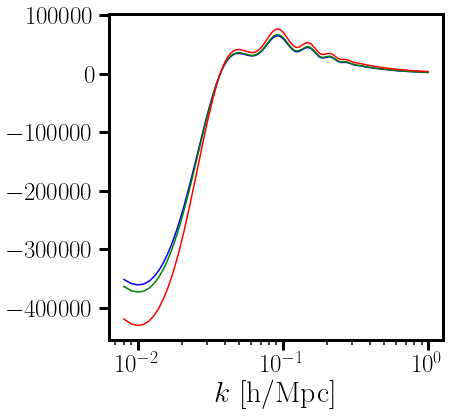

omega_cdm_425.txt


<Figure size 432x288 with 0 Axes>

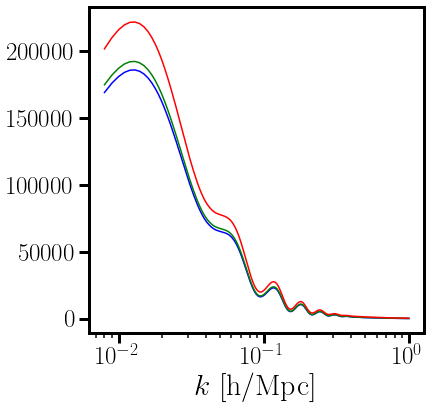

h_425.txt


<Figure size 432x288 with 0 Axes>

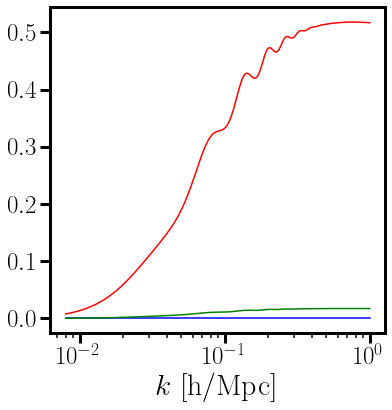

alpha4_225.txt


<Figure size 432x288 with 0 Axes>

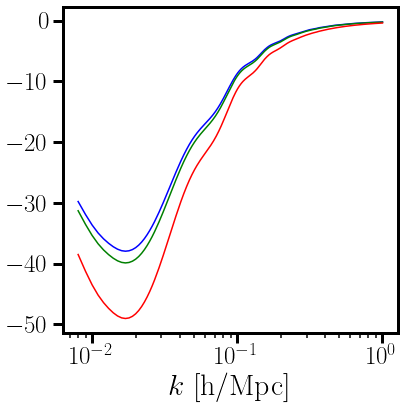

tau_reio_325.txt


<Figure size 432x288 with 0 Axes>

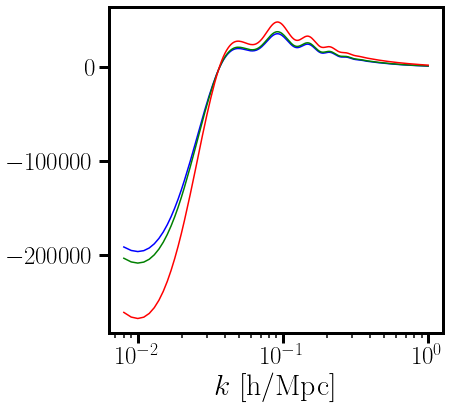

omega_cdm_275.txt


<Figure size 432x288 with 0 Axes>

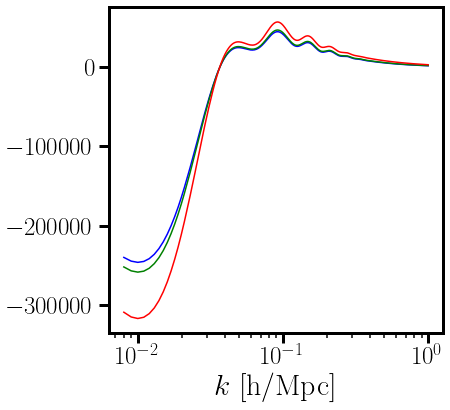

omega_cdm_325.txt


<Figure size 432x288 with 0 Axes>

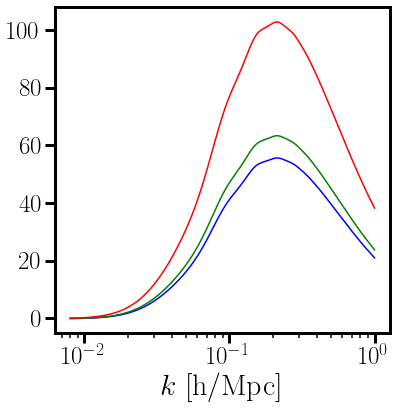

b2_225.txt


<Figure size 432x288 with 0 Axes>

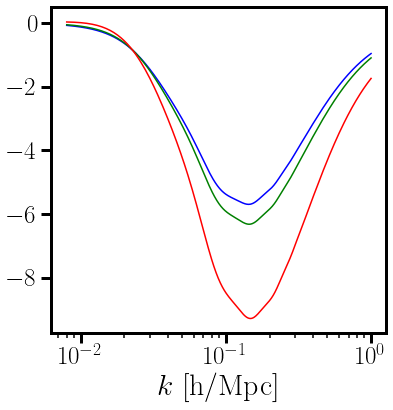

bs_475.txt


<Figure size 432x288 with 0 Axes>

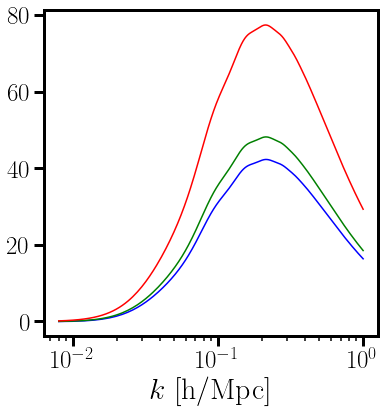

b2_275.txt


<Figure size 432x288 with 0 Axes>

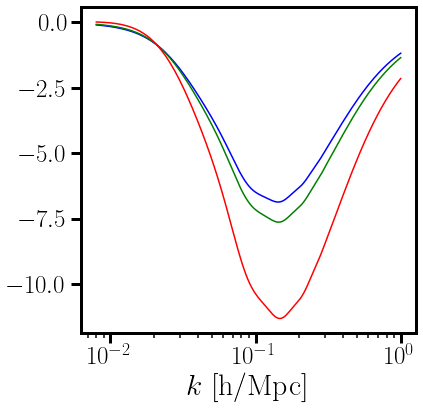

bs_425.txt


<Figure size 432x288 with 0 Axes>

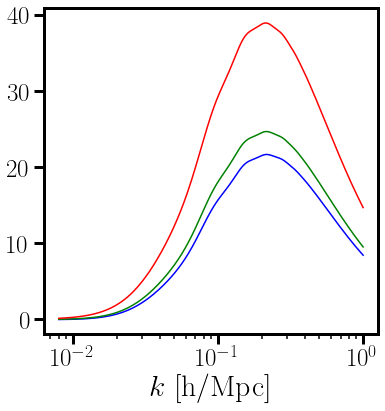

b2_425.txt


<Figure size 432x288 with 0 Axes>

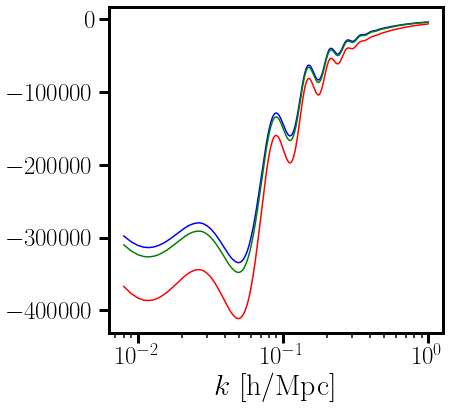

omega_b_375.txt


<Figure size 432x288 with 0 Axes>

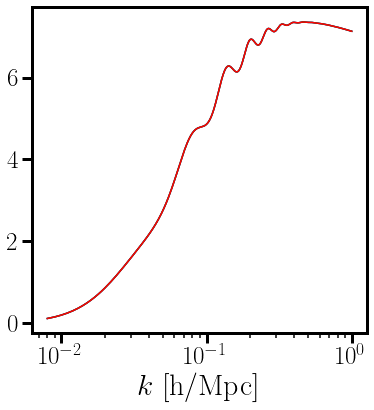

alpha0_325.txt


<Figure size 432x288 with 0 Axes>

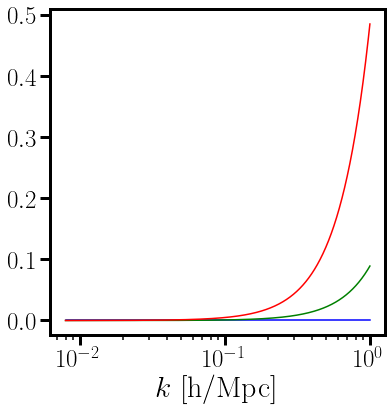

sn2_325.txt


<Figure size 432x288 with 0 Axes>

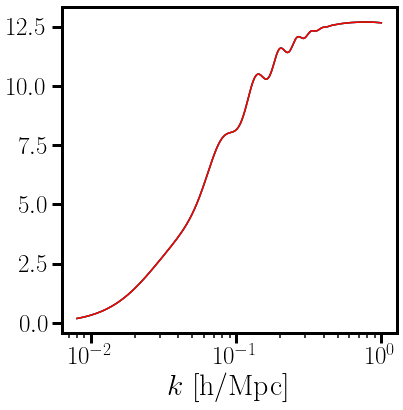

alpha0_225.txt


<Figure size 432x288 with 0 Axes>

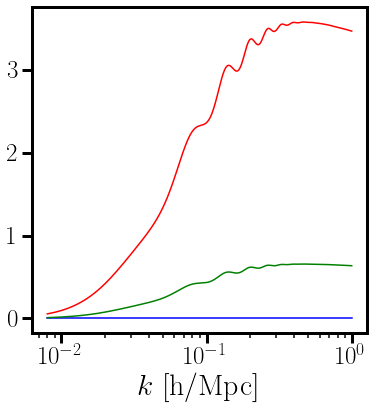

alpha2_325.txt


<Figure size 432x288 with 0 Axes>

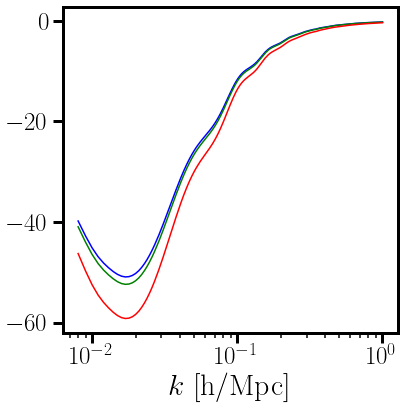

tau_reio_475.txt


<Figure size 432x288 with 0 Axes>

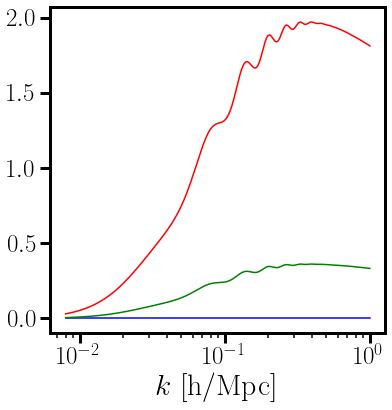

alpha2_475.txt


<Figure size 432x288 with 0 Axes>

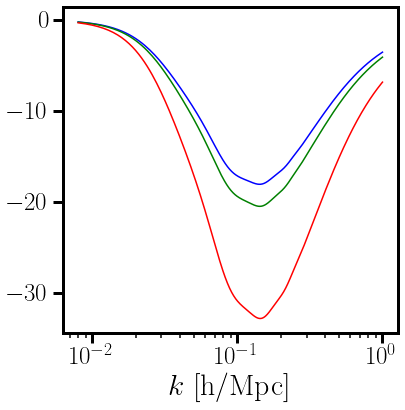

bs_225.txt


<Figure size 432x288 with 0 Axes>

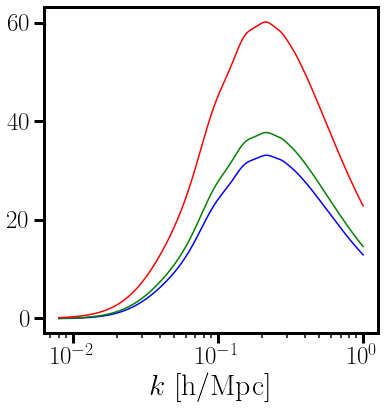

b2_325.txt


<Figure size 432x288 with 0 Axes>

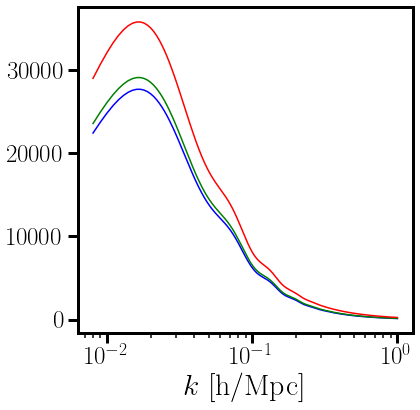

log(A_s)_325.txt


<Figure size 432x288 with 0 Axes>

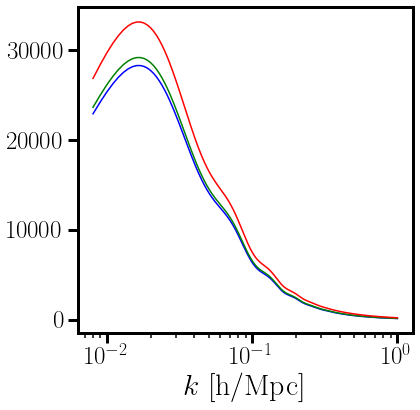

b_275.txt


<Figure size 432x288 with 0 Axes>

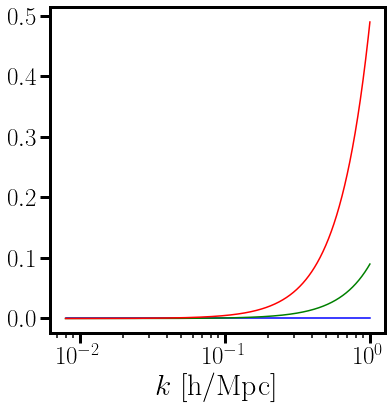

sn2_475.txt


<Figure size 432x288 with 0 Axes>

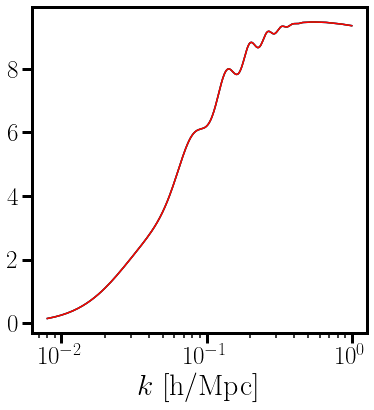

alpha0_275.txt


<Figure size 432x288 with 0 Axes>

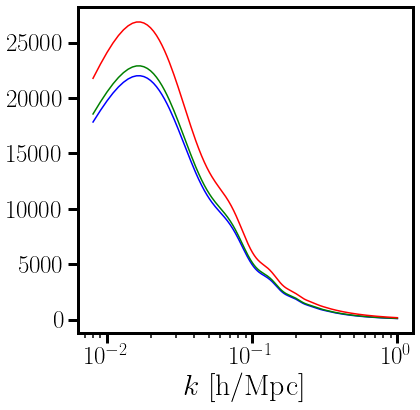

b_225.txt


<Figure size 432x288 with 0 Axes>

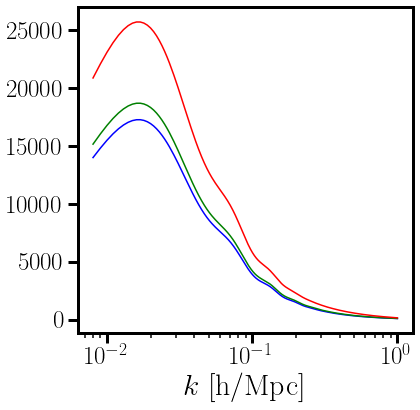

log(A_s)_225.txt


<Figure size 432x288 with 0 Axes>

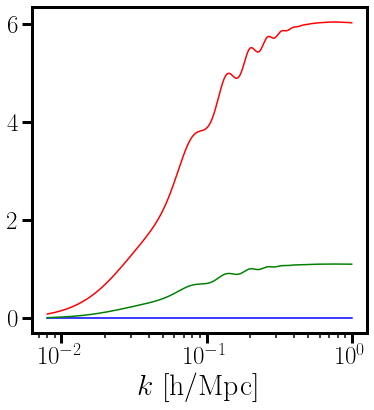

alpha2_225.txt


<Figure size 432x288 with 0 Axes>

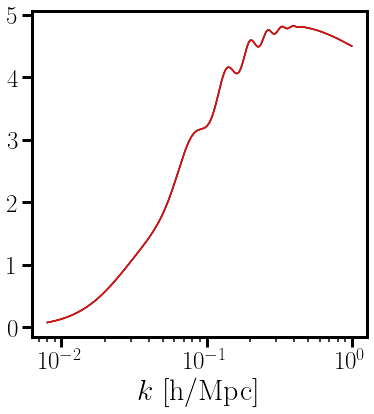

alpha0_425.txt


<Figure size 432x288 with 0 Axes>

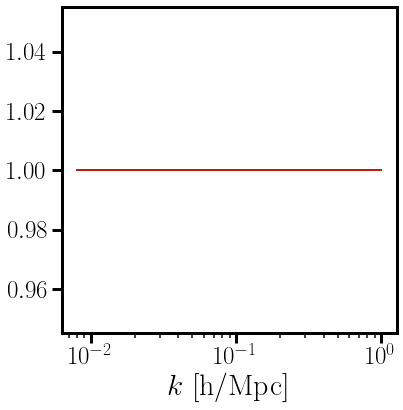

N_275.txt


<Figure size 432x288 with 0 Axes>

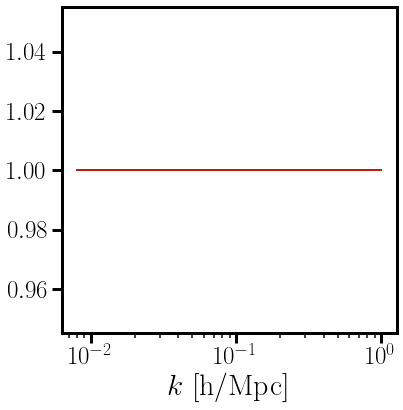

N_225.txt


<Figure size 432x288 with 0 Axes>

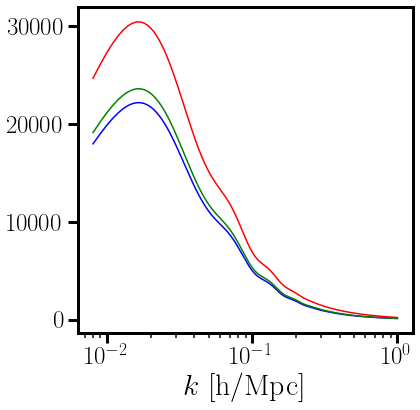

log(A_s)_275.txt


<Figure size 432x288 with 0 Axes>

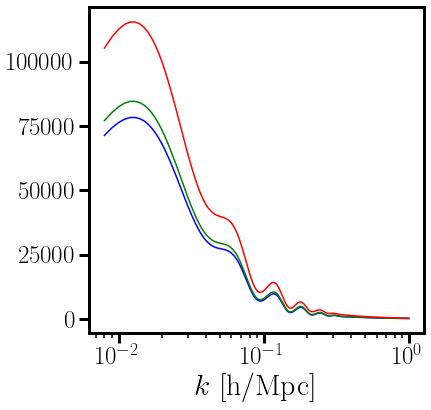

h_225.txt


<Figure size 432x288 with 0 Axes>

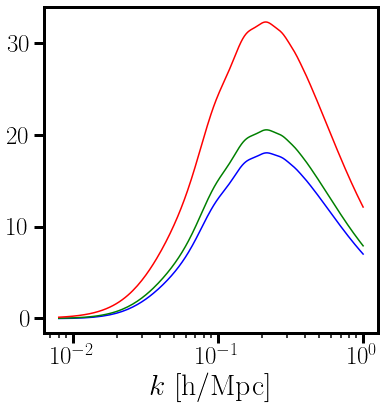

b2_475.txt


<Figure size 432x288 with 0 Axes>

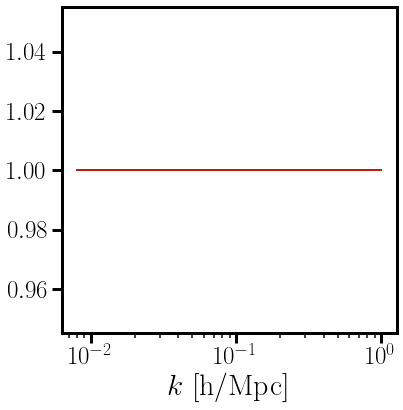

N_425.txt


<Figure size 432x288 with 0 Axes>

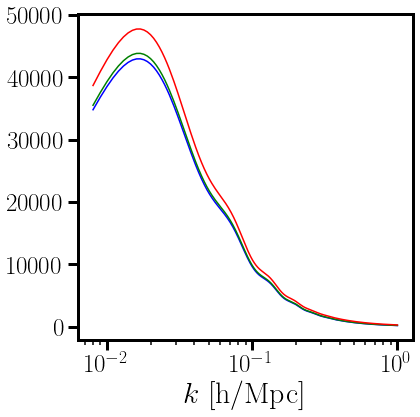

b_375.txt


<Figure size 432x288 with 0 Axes>

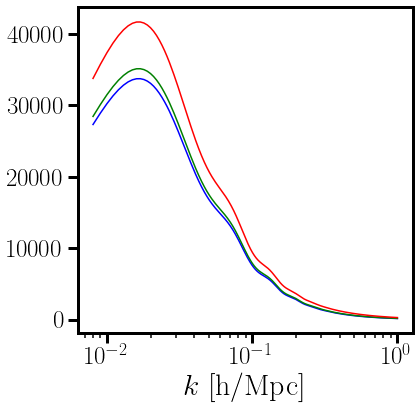

log(A_s)_375.txt


<Figure size 432x288 with 0 Axes>

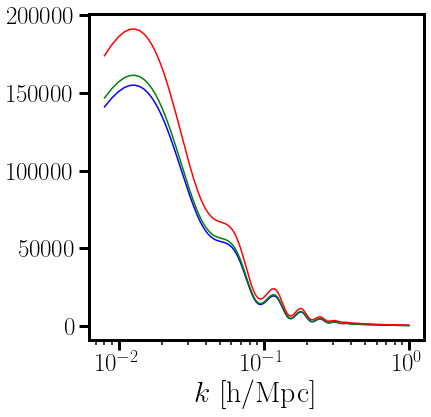

h_375.txt


<Figure size 432x288 with 0 Axes>

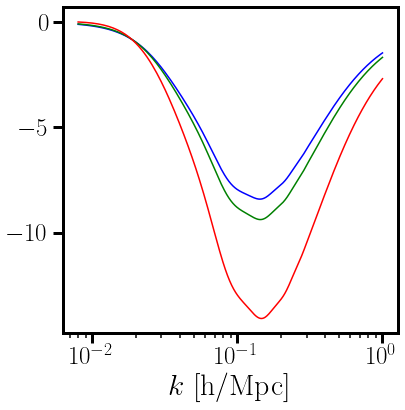

bs_375.txt


<Figure size 432x288 with 0 Axes>

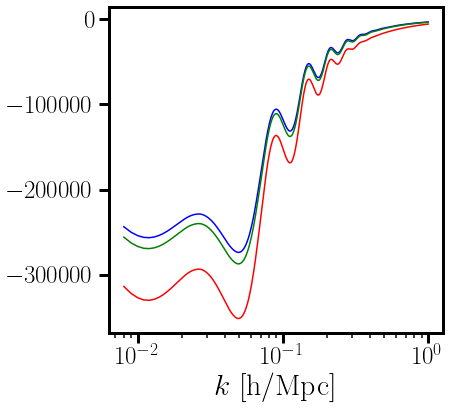

omega_b_325.txt


<Figure size 432x288 with 0 Axes>

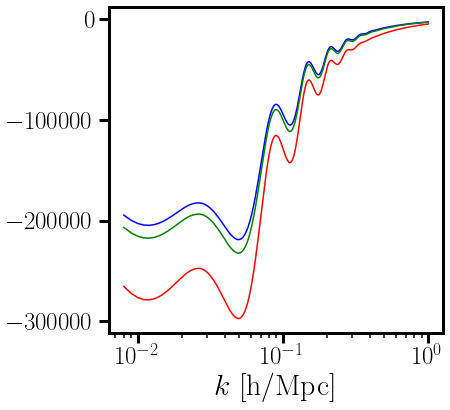

omega_b_275.txt


<Figure size 432x288 with 0 Axes>

b2_375.txt


<Figure size 432x288 with 0 Axes>

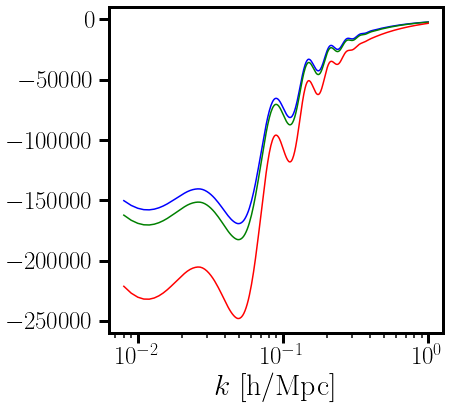

omega_b_225.txt


<Figure size 432x288 with 0 Axes>

alpha4_275.txt


<Figure size 432x288 with 0 Axes>

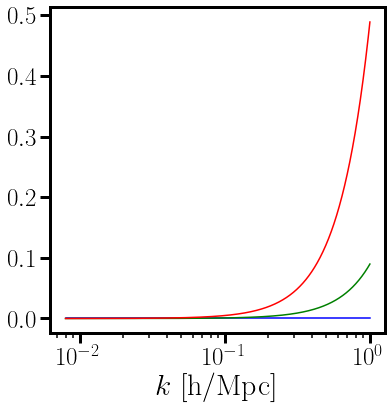

sn2_425.txt


<Figure size 432x288 with 0 Axes>

In [12]:
ngh2_f.check_derivatives()

## Make the Fisher matrix, calculate the uncertainties on $h$

In [13]:
basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','bs','alpha0','alpha2','alpha4','N','sn2'])
F1 = ngh1_f.gen_fisher(basis)
F2 = ngh2_f.gen_fisher(basis)

In [14]:
print(np.sqrt(np.linalg.inv(F1)[0,0]),np.sqrt(np.linalg.inv(F2)[0,0]))

0.04424544826040911 0.004847691136112073


The uncertainty is ~ 10 times larger when using smooth power spectra

In [15]:
import scipy
def sigma_8(k,p):
   dk = list(k[1:]-k[:-1])
   dk.insert(0,dk[0])
   dk = np.array(dk)
   tophat = 3. * scipy.special.spherical_jn(1,8.*k)/(8.*k)
   integrand = tophat**2. * k**2. * p * dk
   return np.sqrt(sum(integrand)/(2.*np.pi**2.))

In [16]:
from twoPoint import *
z=5.
resolution = 1.e2
division_factor = 1.5
klin = np.logspace(np.log10(ngh1_f.khmin),np.log10(ngh1_f.khmax),int(resolution))
plin = np.array([ngh1_f.cosmo.pk_lin(k*ngh1_f.params['h'],z)*ngh1_f.params['h']**3. for k in klin])
p_approx = Peh(klin,plin)
psmooth = scipy.signal.savgol_filter(plin/p_approx,int(resolution/division_factor)+1-int(resolution/division_factor)%2, 6)*p_approx

NameError: name 'Peh' is not defined

In [ ]:
fig,axs = plt.subplots(2,1,figsize=(12,8),sharex=True,gridspec_kw={'height_ratios': [2, 1]})
axs[0].semilogx(klin,klin*p_approx,color='green',lw=3,label=r'$P_\text{approx}$')
axs[0].semilogx(klin,klin*plin,color='blue',lw=3,label=r'$P^\text{w}_\text{lin}$')
axs[0].semilogx(klin,klin*psmooth,color='red',lw=3,label=r'$P^\text{nw}_\text{lin}$')
axs[0].legend(loc='upper left',frameon=False,fontsize='small',title=r'$\sigma^\text{w}_8/\sigma^\text{nw}_8=$ '\
              +str(round(sigma_8(klin,plin)/sigma_8(klin,psmooth),6)))
axs[1].semilogx(klin,plin/psmooth,color='k',label='with BAO',lw=3)
#plt.legend(loc='upper left',frameon=False)
axs[1].set_xlabel(r'$k$ [h/Mpc]')
#plt.ylabel(r'$k P_\text{lin}(k)$ [Mpc/h]$^2$')
axs[1].set_ylim(0.93,1.07)
axs[1].set_xlim(0.0008,1)
axs[0].set_xlim(0.0008,1)
axs[1].set_ylabel(r'$P^\text{w}/P^\text{nw}$')
axs[0].set_ylabel(r'$kP_\text{lin}(k)$')

In [26]:
n = 5

In [27]:
basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','bs','alpha0','alpha2','alpha4','N','sn2'])
F1 = ngh1_f.gen_fisher(basis)
F2 = ngh2_f.gen_fisher(basis)
# change from omega_b to 10^{-2} omega_b basis
F1[4,:] /= 100.
F1[:,4] /= 100.
F2[4,:] /= 100.
F2[:,4] /= 100.

In [29]:
print(np.sqrt(np.linalg.inv(F1)[0,0]),np.sqrt(np.linalg.inv(F2)[0,0]))

0.04424544827524072 0.004847691136096647


In [30]:
# fiducial values
FID_VAL = np.array([0.6770,np.log(2.10732e-9)+np.log(10.**10.),0.11923,0.96824,0.02247*100.,0.0568])
LABELS = np.array([r'$h$',r'$\ln(10^{10}A_s)$',r'$\omega_\text{cdm}$',r'$n_s$',r'$10^2\omega_\text{b}$',r'$\tau$'])

fig, axs = plt.subplots(n,n,figsize=(20,20),gridspec_kw={'hspace': 0.,'wspace':0.})

for i in range(n):
   for j in range(n):
      axs[i,j].tick_params(direction='inout')
      if i<j: axs[i,j].axis('off')
      if i>=j and j!=0: axs[i,j].yaxis.set_ticklabels([])
      if i==j: axs[i,j].yaxis.set_visible(False)
        
for j in range(n-1):
   for i in range(j,n): 
      axs[i,j].get_shared_x_axes().join(axs[i,j],axs[n-1,j])   

for j in range(1,n):
   for i in range(j): 
      axs[j,i].get_shared_y_axes().join(axs[j,i],axs[j,0])
        
def plot_ellipse(F,i,j,cs):
   Finv = np.linalg.inv(F)
   Ginv = np.array([[Finv[i,i],Finv[i,j]],[Finv[i,j],Finv[j,j]]])
   G = np.linalg.inv(Ginv)
   eigenvals,S = np.linalg.eig(G)
   D = np.diag(eigenvals)
   # find the solution of the ellipse in the diagonal basis
   theta = np.linspace(0.,2.*np.pi,1000)
   for k,f in enumerate(np.array([0.167,0.434])):
      xprime = np.cos(theta) / np.sqrt(f * D[0,0])
      yprime = np.sin(theta) / np.sqrt(f * D[1,1])
      # transform back to the parameter basis
      x,y = np.dot(S, np.array([xprime,yprime]))
      fid_val1 = FID_VAL[i]
      fid_val2 = FID_VAL[j]
      x += fid_val1
      y += fid_val2
      axs[i,j].fill(y,x,c=cs[k],alpha=0.3)
      axs[i,j].plot(y,x,c=cs[-1],lw=2)
    
def plot_gaussian(F,i,c):
    Finv = np.linalg.inv(F)
    sigma = np.sqrt(Finv[i,i])
    fid_val = FID_VAL[i]
    domain = np.linspace(fid_val-5.*sigma,fid_val+5.*sigma,100)
    gauss = np.exp(- (domain-fid_val)**2./(2.*sigma**2.))
    axs[i,i].plot(domain,gauss,c=c,lw=2)
    
for i in range(n): 
   plot_gaussian(F1,i,'blue')
   plot_gaussian(F2,i,'red')
   #plot_gaussian(F_megamapper+F_puma,i,'green')
    
for i in range(n-1):
   for j in range(1+i,n):
      plot_ellipse(F1,j,i,['lightblue','blue'])
      plot_ellipse(F2,j,i,['pink','red'])
      #plot_ellipse(F_megamapper+F_puma,j,i,['lightgreen','green'])
    
#axs[5,0].set_ylim(0,0.07)  
#axs[n-1,5].set_xlim(0,0.07)
#axs[6,0].set_ylim(0,0.012)  
#axs[n-1,6].set_xlim(0,0.012)
#axs[n-1,1].set_xlim(3.03,3.07)
#axs[n-1,2].set_xlim(0.116,0.122)

for i in range(n): 
  axs[i,0].set_ylabel(LABELS[i])
  axs[n-1,i].set_xlabel(LABELS[i])
    
for i in range(n-1): axs[i,0].xaxis.set_ticklabels([])

axs[0,n-1].plot([],[],c='blue',label='Without wiggles')
axs[0,n-1].plot([],[],c='red',label='With wiggles')
#axs[0,n-1].plot([],[],c='green',label='MegaMapper+PUMA')
axs[0,n-1].legend(loc=0,frameon=False)
fig.autofmt_xdate()
plt.savefig('figures/posterior_matrix_wig_v_nowig.pdf',bbox_inches='tight')